In [1]:
import numpy as np
from orphics import maps, cosmology,io,stats
import matplotlib.pyplot as plt
from scipy import optimize
import cosmo_cleaner
from cosmo_cleaner import fisher as fisher,plot
import camb
from cosmo_cleaner import cosmology
from cosmo_cleaner import triangle_plot
import camb
from camb import model, initialpower
from cosmo_cleaner import fisher as fisher,plot

from orphics import stats
def bandedcls(cl,_bin_edges):
    ls=np.arange(cl.size)
    binner = stats.bin1D(_bin_edges)
    cents,bls = binner.bin(ls,cl)
    return cents,bls
planck_bins=np.array([8,21,40,66,101,145,199,264,339,426,526,638,763,902,1100,1300,1500,1700,2048])
%config InlineBackend.figure_format = 'retina'


In [2]:
#check for perturbation in clkg
import numpy as np
def get_corr(cross,f1,f2):
    return np.sqrt(cross**2/(f1*f2))

defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -1.
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.0,'bias':1,'A_e':1.,'A_l':1.,'omega_k':0,'mctheta': 0.01040909}
for i in range(300):
    defaultCosmology[f'lsst_bias{i}']=1

nz = 1000
kmax = 10
zmin = 0.
ells=np.arange(5000)

parst = camb.CAMBparams()
parst.set_dark_energy(w=defaultCosmology['w0'],wa = defaultCosmology['wa'], dark_energy_model = 'ppf')
parst.set_cosmology(cosmomc_theta = defaultCosmology['mctheta'],ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
parst.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])
results = camb.get_results(parst)
default=cosmology.cosmology(nz,kmax,zmin,ells,defaultCosmology,parst,results)

In [3]:
def get_clkk(lmax=3000,lens_kmax=1000,zmin=0):
    cSpeedKmPerSec = 299792.458
    ells=np.arange(lmax)
    wk = np.ones(default.chis.shape)
    precalcFactor= default.Hzs**2./default.chis/default.chis/cSpeedKmPerSec**2.
    lw=default.get_lensing_window(zmin=zmin)

    clkk=[]
    for l in ells:
        w_eff=np.zeros(len(c_full[:N,l]**2@wgals[:N]**2))
        for field_i in range(len(c_full[:N,l])):
            for field_j in range(len(c_full[:N,l])):
                w_eff+=c_full[field_i][l]*c_full[field_j][l]*wgals[field_i]*wgals[field_j]
        w_eff=np.sqrt(w_eff)
        ls=lw**2-weight_full[l]*w_eff*lw
        ls[default.zs<mid[X]]=0
        k=(l+0.5)/default.chis
        wk[:]=1
        wk[k<1e-4]=0
        wk[k>=lens_kmax]=0
        pkin = default.PK.P(default.zs, k, grid=False)
        common = ((wk*pkin)*precalcFactor)[default.zs>=default.zmin]        
        estCl = np.dot(default.dchis[default.zs>=default.zmin], common*((ls))[default.zs>=default.zmin])
        clkk.append(estCl)
    return np.array(clkk)

In [4]:
#get the clggs
def get_clgg(galaxywindow,lmax=3000):
    cSpeedKmPerSec = 299792.458
    cl_autog=[]
    ellsgg=np.arange(lmax)
    wg = np.ones(default.chis.shape)
    precalcFactor= default.Hzs**2./default.chis/default.chis/cSpeedKmPerSec**2.
    for l in ellsgg:
        k=(l+0.5)/default.chis
        wg[:]=1
        wg[k<1e-4]=0
        wg[k>=default.kmax]=0
        pkin = default.PK.P(default.zs, k, grid=False)
        common = ((wg*pkin)*precalcFactor)[default.zs>=default.zmin]        
        estCl = np.dot(default.dchis[default.zs>=default.zmin], common*(galaxywindow*galaxywindow)[default.zs>=default.zmin])
        cl_autog.append(estCl)
    return np.array(cl_autog)

In [6]:
#CHECK THE ABOVE MATCH UP WITH WINDOW FUNCTION FROM HERE
def get_clkk(lmax=3000,lens_kmax=1000,zmin=0):
    cSpeedKmPerSec = 299792.458
    ells=np.arange(lmax)
    wk = np.ones(default.chis.shape)
    precalcFactor= default.Hzs**2./default.chis/default.chis/cSpeedKmPerSec**2.
    lw=default.get_lensing_window(zmin=zmin)

    clkk=[]
    for l in ells:
        w_eff=np.zeros(len(c_full[:N,l]**2@wgals[:N]**2))
        for field_i in range(len(c_full[:N,l])):
            for field_j in range(len(c_full[:N,l])):
                w_eff+=c_full[field_i][l]*c_full[field_j][l]*wgals[field_i]*wgals[field_j]
        w_eff=np.sqrt(w_eff)
        ls=lw**2-weight_full[l]*w_eff*lw
        ls[default.zs<mid[X]]=0
        k=(l+0.5)/default.chis
        wk[:]=1
        wk[k<1e-4]=0
        wk[k>=lens_kmax]=0
        pkin = default.PK.P(default.zs, k, grid=False)
        common = ((wk*pkin)*precalcFactor)[default.zs>=default.zmin]        
        estCl = np.dot(default.dchis[default.zs>=default.zmin], common*((ls))[default.zs>=default.zmin])
        clkk.append(estCl)
    return np.array(clkk)

In [7]:
bins=default.LSST_bins
def dn_dz_LSST(z,z0=0.3):
    return (1/(2*z0))*(z/z0)**2*np.exp(-z/z0)

In [8]:
zs=default.LSST_bins
kg_index=len(zs)-1
cls_lsstc=default.get_lsst_lensing_cross(lenszmin=0,lmax=2000,cut=0.3*0.67)
covgg=cls_lsstc[1][2*kg_index:-1] #all the cls crosses

In [9]:
#get all the clgg up to L=300
cut=200
clggs=[]
clkgs=[]
wgals=[]
for i in range(len(bins)-1):
    clggs.append(cls_lsstc[0][f'g{i}g{i}'][:cut])
    clkgs.append(cls_lsstc[0][f'kg{i}'][:cut])
    wgals.append(default.lsst_window(i))
clggs=np.array(clggs)
clkgs=np.array(clkgs)
wgals=np.array(wgals)


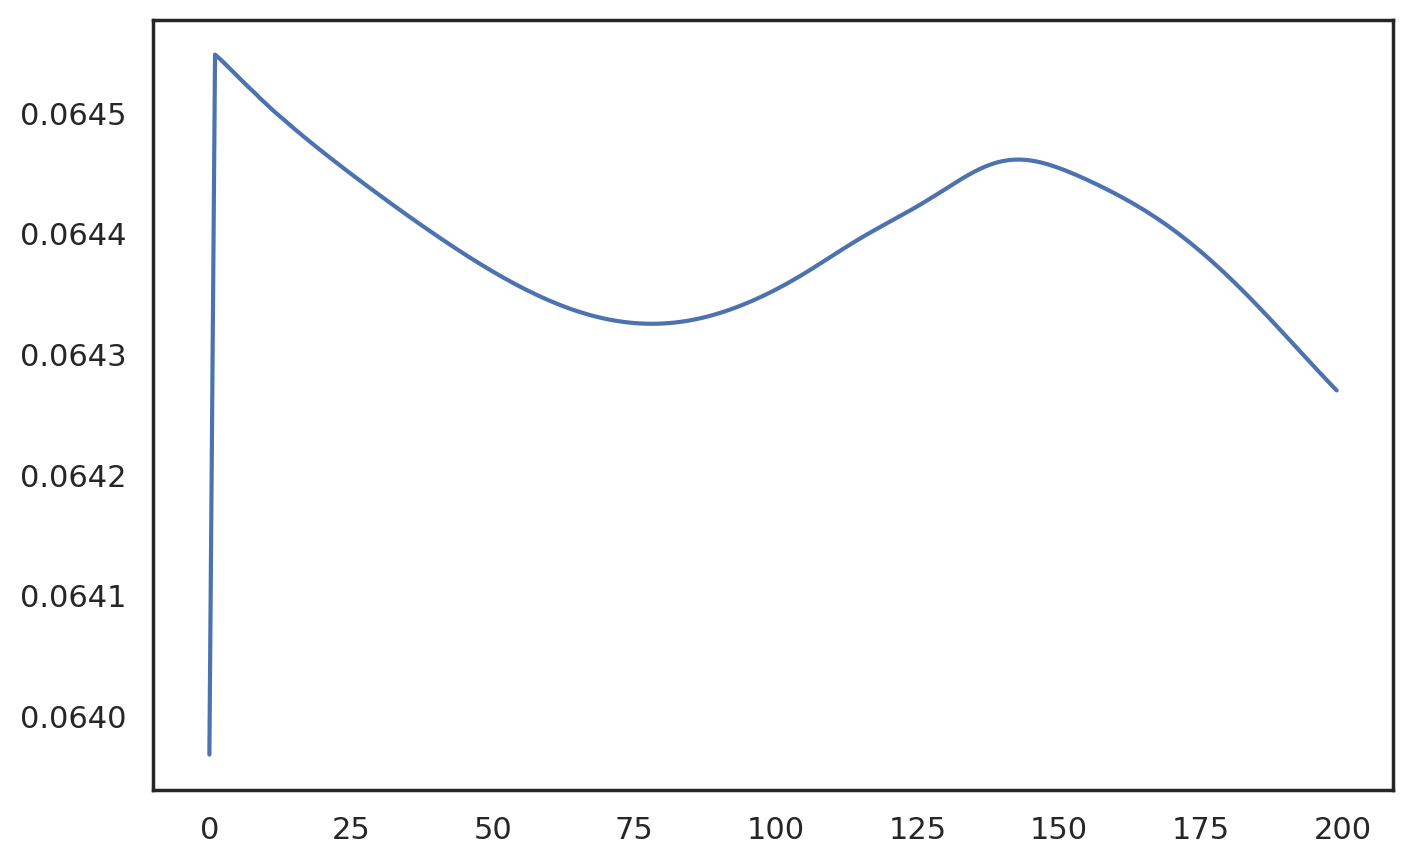

In [45]:
plt.plot(clkgs[3]/clggs[3])


In [12]:
bins=default.LSST_bins
mid=(bins[1:] + bins[:-1]) / 2
mid=np.append(mid,5)
X=len(bins)-1


In [13]:
#build the covmat

#N is the numbe
N=X

covmat=np.zeros((cut,N,N))
for row in range(N):
    for col in range(N):
            try:
                covmat[:cut,row,col]=cls_lsstc[0][f'g{row}g{col}'][:cut]
            except:
                covmat[:cut,row,col]=cls_lsstc[0][f'g{col}g{row}'][:cut]
    #L=0 covmat singular, just replace singular rows by covmat at L=2
for row in range(N):
    if (covmat[0,row,:]==np.zeros(N)).all():
        covmat[0,row,:]= covmat[1,rbow,:]

inv=np.linalg.inv(covmat)         

In [49]:
clkgs.shape

(14, 200)

In [46]:
c_full[0]

array([0.13162373, 0.1262091 , 0.12278476, 0.12031762, 0.11842295,
       0.1169124 , 0.11567779, 0.11465124, 0.11378691, 0.1130525 ,
       0.1124242 , 0.11188397, 0.11141778, 0.11101448, 0.1106651 ,
       0.11036226, 0.11009983, 0.10987268, 0.10967643, 0.10950732,
       0.10936214, 0.10923805, 0.10913257, 0.10904354, 0.10896901,
       0.10890728, 0.1088568 , 0.10881619, 0.10878421, 0.10875975,
       0.10874179, 0.10872942, 0.10872182, 0.10871824, 0.108718  ,
       0.10872048, 0.10872515, 0.10873149, 0.10873906, 0.10874747,
       0.10875636, 0.1087654 , 0.10877433, 0.10878289, 0.10879089,
       0.10879814, 0.10880449, 0.10880982, 0.10881402, 0.10881703,
       0.10881878, 0.10881925, 0.10881842, 0.10881628, 0.10881286,
       0.10880818, 0.10880229, 0.10879524, 0.10878709, 0.10877792,
       0.1087678 , 0.10875681, 0.10874505, 0.10873262, 0.1087196 ,
       0.10870611, 0.10869223, 0.10867808, 0.10866375, 0.10864933,
       0.10863493, 0.10862064, 0.10860656, 0.10859276, 0.10857

In [14]:
c_full=np.einsum('...ji,i...->j...', inv, clkgs[:N])

clxx=np.zeros(len(clggs[0]))
for field_i in range(N):
    for field_j in range(N):
        try:
            clxx+=c_full[field_i]*c_full[field_j]*cls_lsstc[0][f'g{field_i}g{field_j}'][:cut]
        except:
            clxx+=c_full[field_i]*c_full[field_j]*cls_lsstc[0][f'g{field_j}g{field_i}'][:cut]
clxk=np.nansum(c_full*clkgs[:N],axis=0)
weight_full=clxk/clxx

In [15]:
#the c_i weighting results in clxk/clxx which are ones
weight_full

array([1.00000001, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [16]:
L=100
w_eff=np.zeros(len(c_full[:N,L]**2@wgals[:N]**2))

for field_i in range(len(c_full[:N,L])):
    for field_j in range(len(c_full[:N,L])):
        w_eff+=c_full[field_i][L]*c_full[field_j][L]*wgals[field_i]*wgals[field_j]
w_eff=np.sqrt(w_eff)

In [37]:
c_full[0]

array([0.13162373, 0.1262091 , 0.12278476, 0.12031762, 0.11842295,
       0.1169124 , 0.11567779, 0.11465124, 0.11378691, 0.1130525 ,
       0.1124242 , 0.11188397, 0.11141778, 0.11101448, 0.1106651 ,
       0.11036226, 0.11009983, 0.10987268, 0.10967643, 0.10950732,
       0.10936214, 0.10923805, 0.10913257, 0.10904354, 0.10896901,
       0.10890728, 0.1088568 , 0.10881619, 0.10878421, 0.10875975,
       0.10874179, 0.10872942, 0.10872182, 0.10871824, 0.108718  ,
       0.10872048, 0.10872515, 0.10873149, 0.10873906, 0.10874747,
       0.10875636, 0.1087654 , 0.10877433, 0.10878289, 0.10879089,
       0.10879814, 0.10880449, 0.10880982, 0.10881402, 0.10881703,
       0.10881878, 0.10881925, 0.10881842, 0.10881628, 0.10881286,
       0.10880818, 0.10880229, 0.10879524, 0.10878709, 0.10877792,
       0.1087678 , 0.10875681, 0.10874505, 0.10873262, 0.1087196 ,
       0.10870611, 0.10869223, 0.10867808, 0.10866375, 0.10864933,
       0.10863493, 0.10862064, 0.10860656, 0.10859276, 0.10857

In [38]:
L=150
w_eff150=np.zeros(len(c_full[:N,L]**2@wgals[:N]**2))

for field_i in range(len(c_full[:N,L])):
    for field_j in range(len(c_full[:N,L])):
        w_eff150+=c_full[field_i][L]*c_full[field_j][L]*wgals[field_i]*wgals[field_j]
w_eff150=np.sqrt(w_eff150)

In [39]:
#lensing window function
lw=default.get_lensing_window(zmin=0)

(0.0, 7.0)

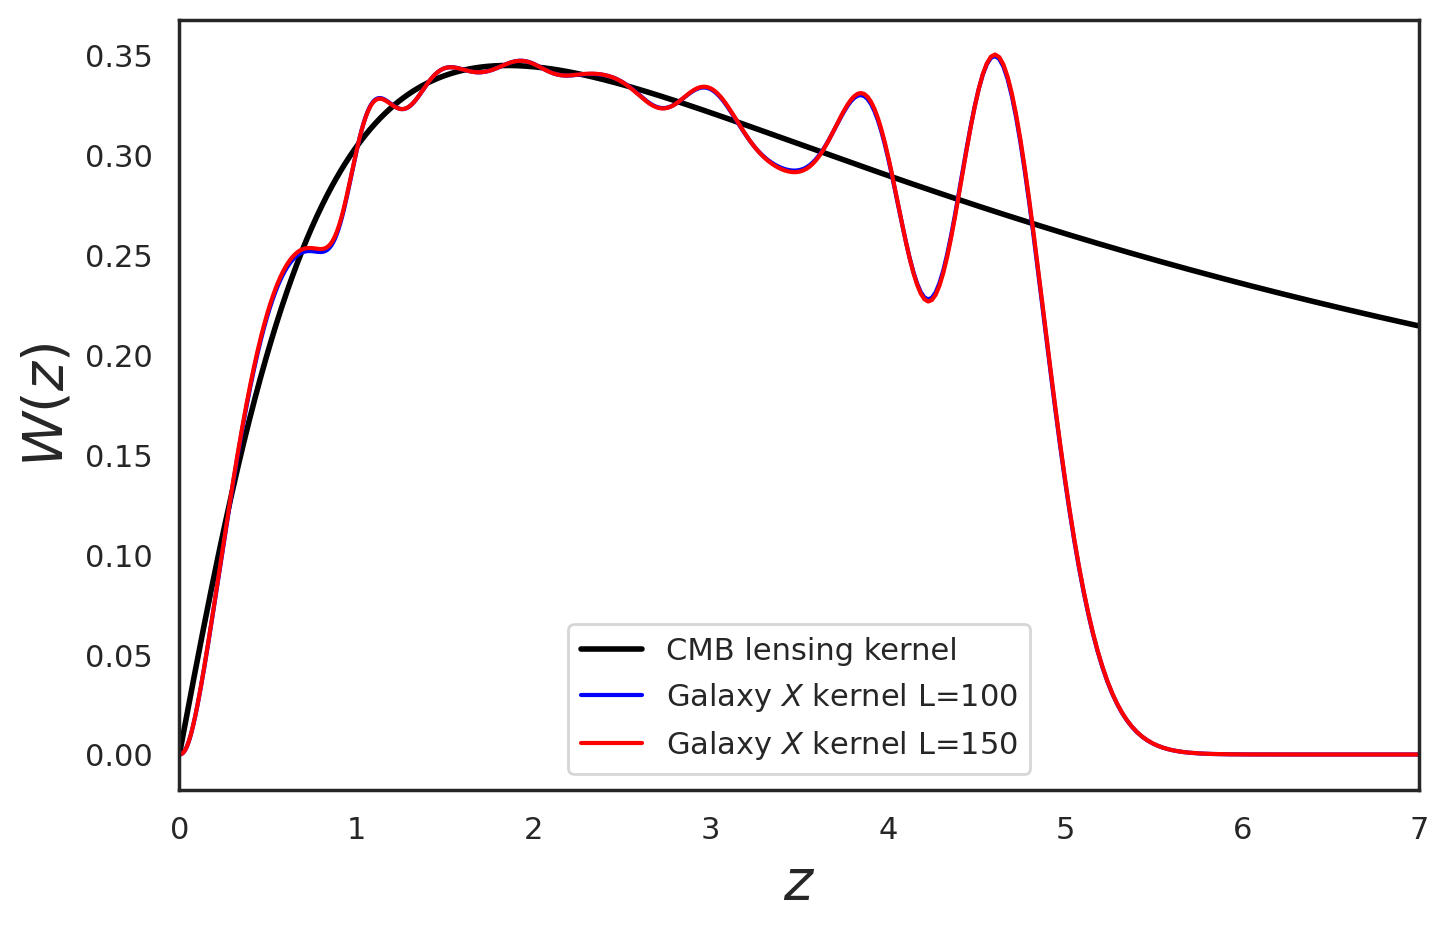

In [40]:
import seaborn as sns
sns.set_theme(style='white')
import matplotlib

matplotlib.rc('figure', figsize=(8, 5))
plt.plot(default.zs,lw,linewidth=2,color='black',label='CMB lensing kernel')
plt.plot(default.zs,w_eff,color='blue',label='Galaxy $X$ kernel L=100')
plt.plot(default.zs,w_eff150,color='red',label='Galaxy $X$ kernel L=150')

#plt.plot(default.zs,lw-w_eff,linestyle='--',color='red',label='Residual')
plt.legend()
plt.ylabel('$W(z)$',fontsize=20)
plt.xlabel('$z$',fontsize=20)
plt.xlim(0,7)